## **Importing libraries**

---



---

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## **Exploratory Data Analysis (EDA)**

---



---


### **Load the Dataset**

In [ ]:
df=pd.read_csv("/content/customer_churn_large_dataset.csv")

In [ ]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## **Data Description**

---

---


### **Dataset consists customer information for a customer churn prediction problem. It includes the following columns:**

---

### **CustomerID**: Unique identifier for each customer.

---

### **Name**: Name of the customer.

---

### **Age**: Age of the customer.

---

### **Gender**: Gender of the customer (Male or Female).

---

### **Location**: Location of customer.

---

### **Subscription_Length_Months**: The number of months the customer has been subscribed.

---

### **Monthly_Bill**: Monthly bill amount for the customer.

---

### **Total_Usage_GB**: Total usage in gigabytes.

---

### Churn: A binary indicator (1 or 0) representing whether the customer has churned (1) or not (0).

### **Initial Data Exploration**

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [ ]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


### **All variables has correct datatype**

In [ ]:
df.describe()  #Statistical summary of variables

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### **There is No Null values**

In [ ]:
df.duplicated().sum()

0

### **No Duplicate value in data**

###  **To remove unnecessary columns**



In [ ]:
columns_to_drop = ['CustomerID', 'Name','Location']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.head(2)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,17,73.36,236,0
1,62,Female,1,48.76,172,0


In [ ]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [ ]:
## Separate categorical and numerical column names
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

print("Categorical Column Names:")
print(categorical_columns)

print("\nNumerical Column Names:")
print(numerical_columns)

Categorical Column Names:
Index(['Gender'], dtype='object')

Numerical Column Names:
Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [ ]:
def unique_values_per_column(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].nunique()
    return unique_values

unique_counts = unique_values_per_column(df)
print(unique_counts)


{'Age': 53, 'Gender': 2, 'Subscription_Length_Months': 24, 'Monthly_Bill': 7001, 'Total_Usage_GB': 451, 'Churn': 2}


In [ ]:
# Checking correlation between numerical variables

df.corr()

<ipython-input-18-937ce6857f09>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000


<ipython-input-19-b0b5f9fdc77f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


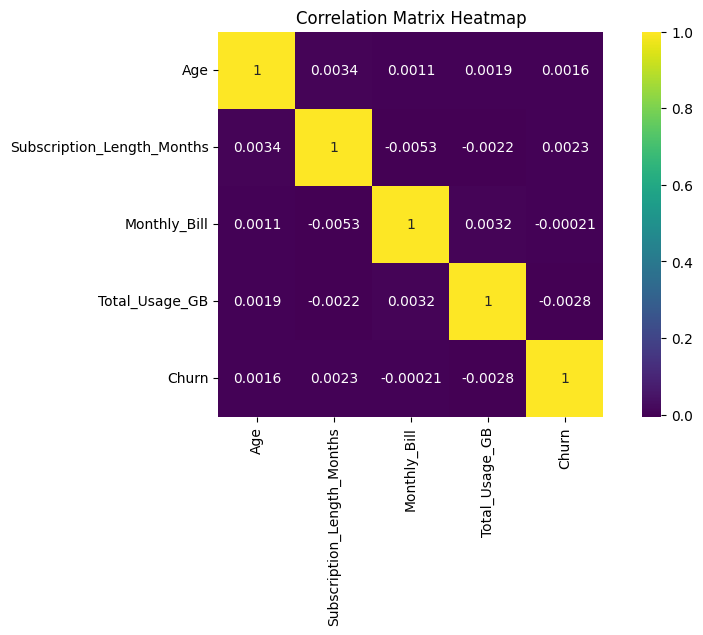

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,5)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## **Age and Subscription Length:**


*   **The correlation between a customer's age and their subscription length is extremely weak, with a positive correlation of approximately 0.0034.**
*   **The correlation between a customer's age and their subscription length is extremely weak, with a positive correlation of approximately 0.0034.**

---

## **Age and Monthly Bill**:


*   **Age and the monthly bill amount exhibit an equally weak positive correlation, measuring around 0.0011.**
*   **This suggests that there is almost no linear connection between a customer's age and the amount they are billed on a monthly basis.**

---

## **Age and Total Usage**:


*   ** When it comes to a customer's age and their total data usage, the correlation is very weak, standing at about 0.0019**.  

---

## **Age and Churn**:

*   **The correlation between age and churn is also quite weak, with a positive correlation of about 0.0016. In practical terms, a customer's age is not a reliable predictor of their likelihood to churn.**

---

## **Monthly Bill and Total Usage:**

*  **Monthly bill amount and total data usage share a very weak positive correlation of approximately 0.0032.**

*   **This means that there is almost no linear relationship between how much a customer is billed and how much data they use.**

---

## **Monthly Bill and Churn:**

* **The correlation between monthly bill amount and churn is extremely weak, with a negative correlation of around -0.0002.**

*   **It implies that the monthly billing amount has little impact on customer churn.**

---

## **Total Usage and Churn**:

*   **Total data usage and churn also exhibit a very weak negative correlation of about -0.0028.**
*   **This indicates that the amount of data a customer uses does not strongly influence their likelihood to churn.**


## **Data Visualization**

---



---



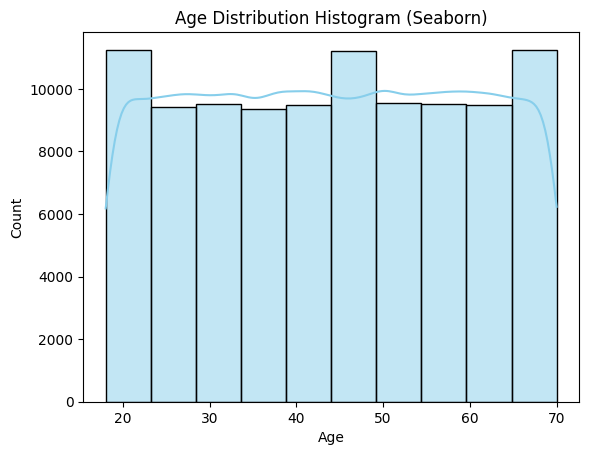

In [ ]:
sns.histplot(data=df, x='Age', bins=10, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution Histogram (Seaborn)')
plt.show()

In [ ]:
def bar_plot_with_percentage(data, column):
    ax = sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'Number of {column}')

    total = len(data[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.show()

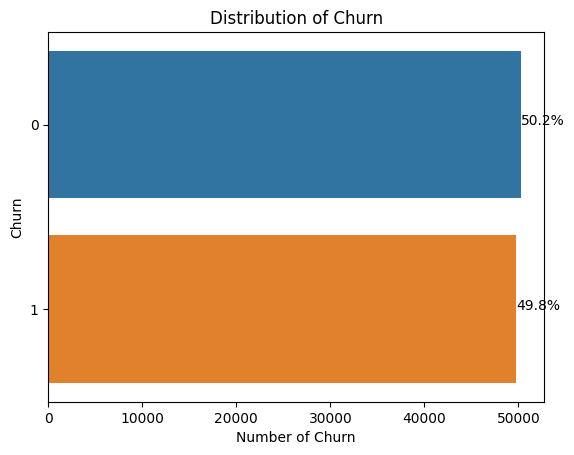

In [ ]:
 bar_plot_with_percentage(df,'Churn')

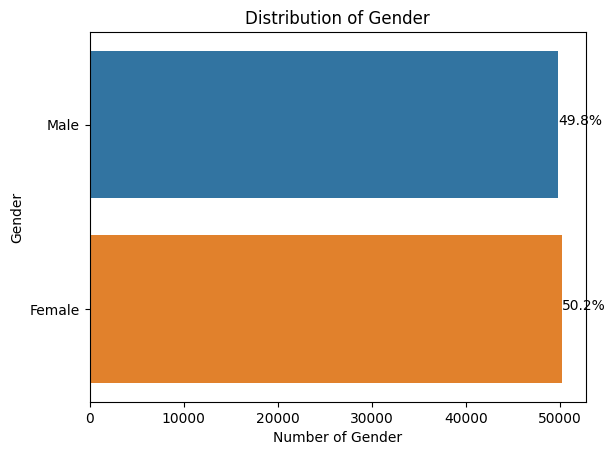

In [ ]:
 bar_plot_with_percentage(df,'Gender')

### **The frequency of females is greater than that Ma**le.

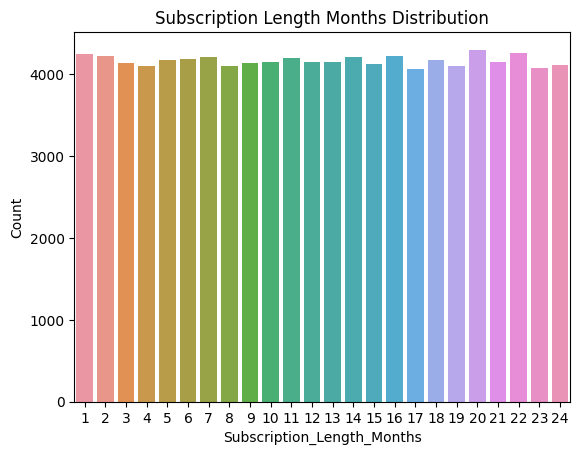

In [ ]:
sns.countplot(data=df, x='Subscription_Length_Months')
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Count')
plt.title('Subscription Length Months Distribution')
plt.show()

### **Most of people take subcription for 20 month**

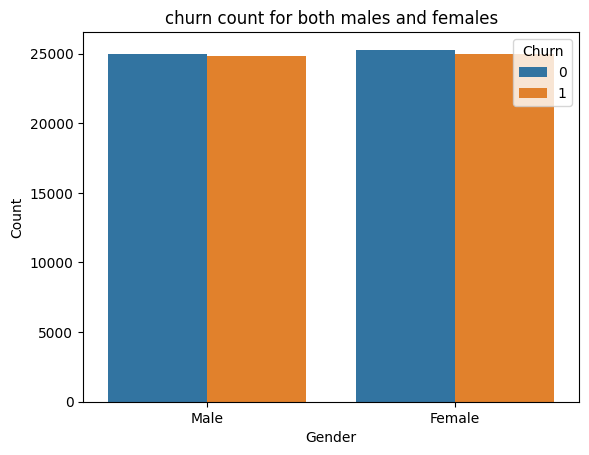

In [ ]:
sns.countplot(x ='Gender', hue='Churn', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('churn count for both males and females')
plt.show()

### **Label Encoding**

---



---


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Gender	'.
df['Gender']= label_encoder.fit_transform(df['Gender'])


In [ ]:
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,17,73.36,236,0
1,62,0,1,48.76,172,0
2,24,0,5,85.47,460,0
3,36,0,3,97.94,297,1
4,46,0,19,58.14,266,0
...,...,...,...,...,...,...
99995,33,1,23,55.13,226,1
99996,62,0,19,61.65,351,0
99997,64,1,17,96.11,251,1
99998,51,0,20,49.25,434,1


##**Outlier Detection and checking the distribution of data**

---



---







### **Age**




<Axes: xlabel='Age'>

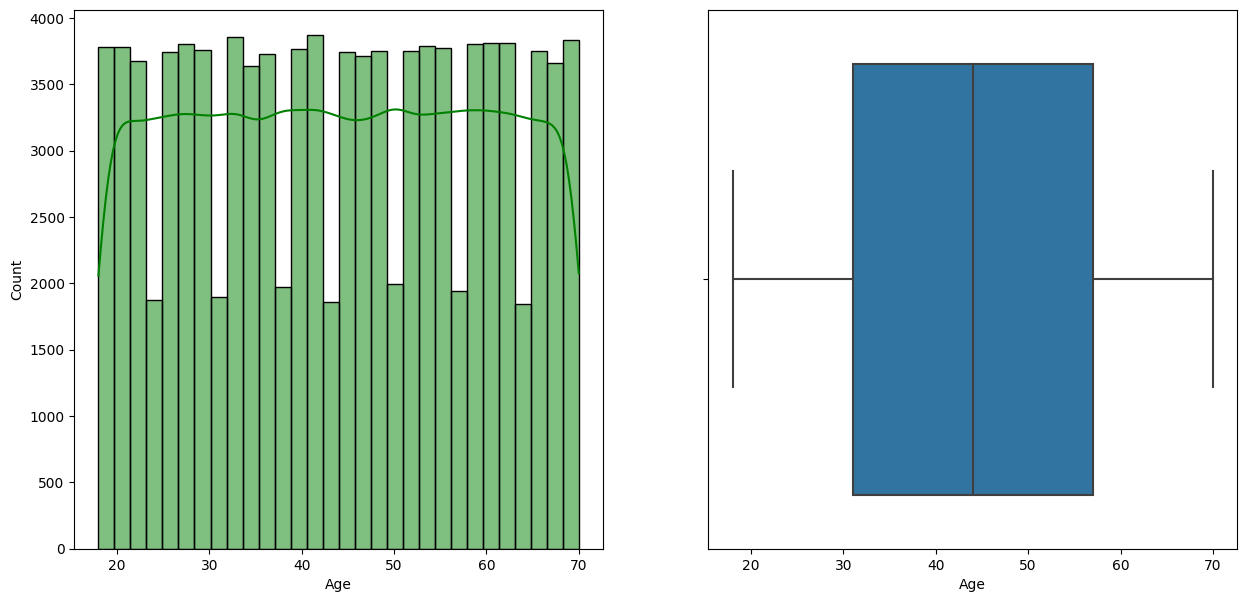

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df,x='Age')


### **Gender**

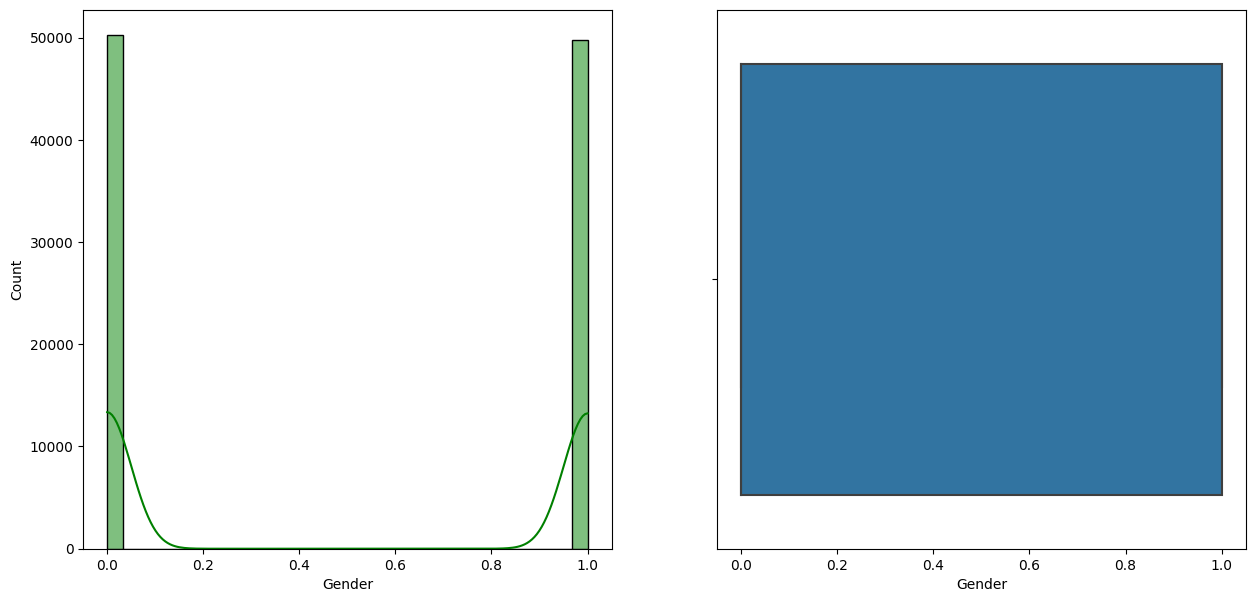

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Gender',bins=30,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df,x='Gender')
plt.show()

### **Subscription_Length_Months**

<Axes: xlabel='Subscription_Length_Months'>

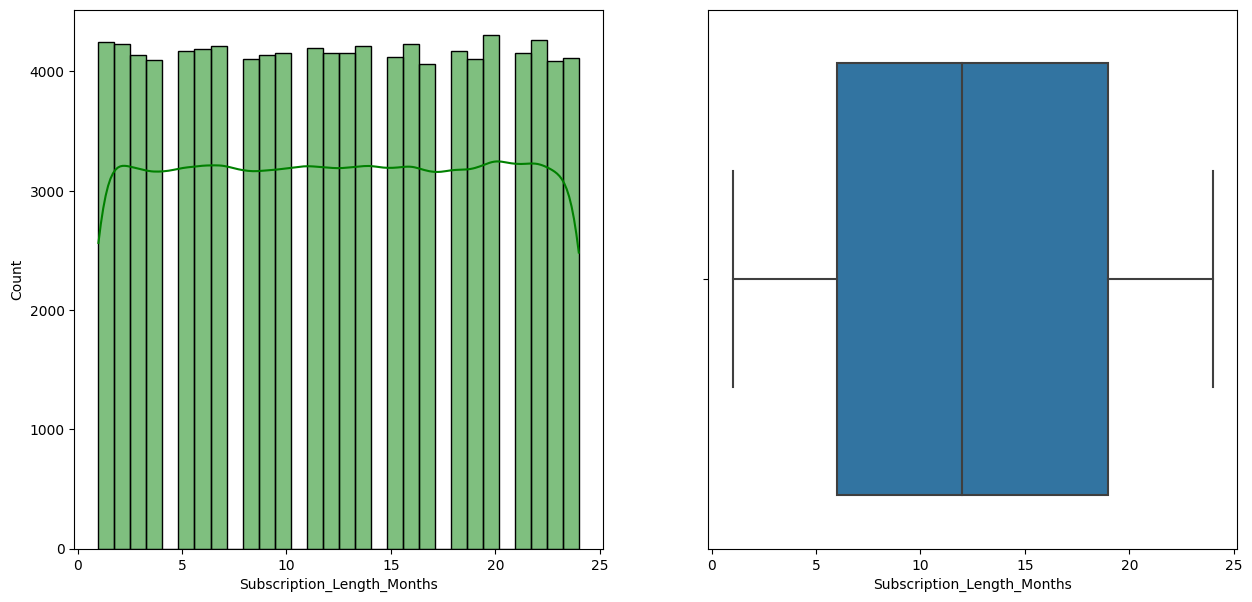

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Subscription_Length_Months',bins=30,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df,x='Subscription_Length_Months')



### **Monthly_Bill**

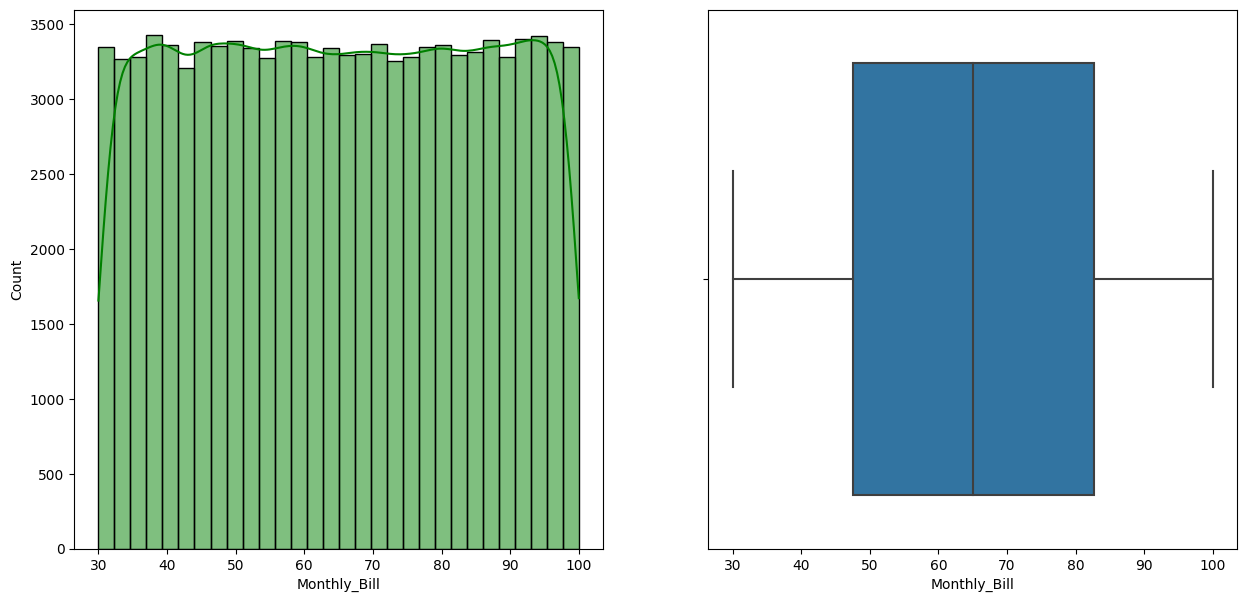

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Monthly_Bill',bins=30,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df,x='Monthly_Bill')
plt.show()



### **Total_Usage_GB**

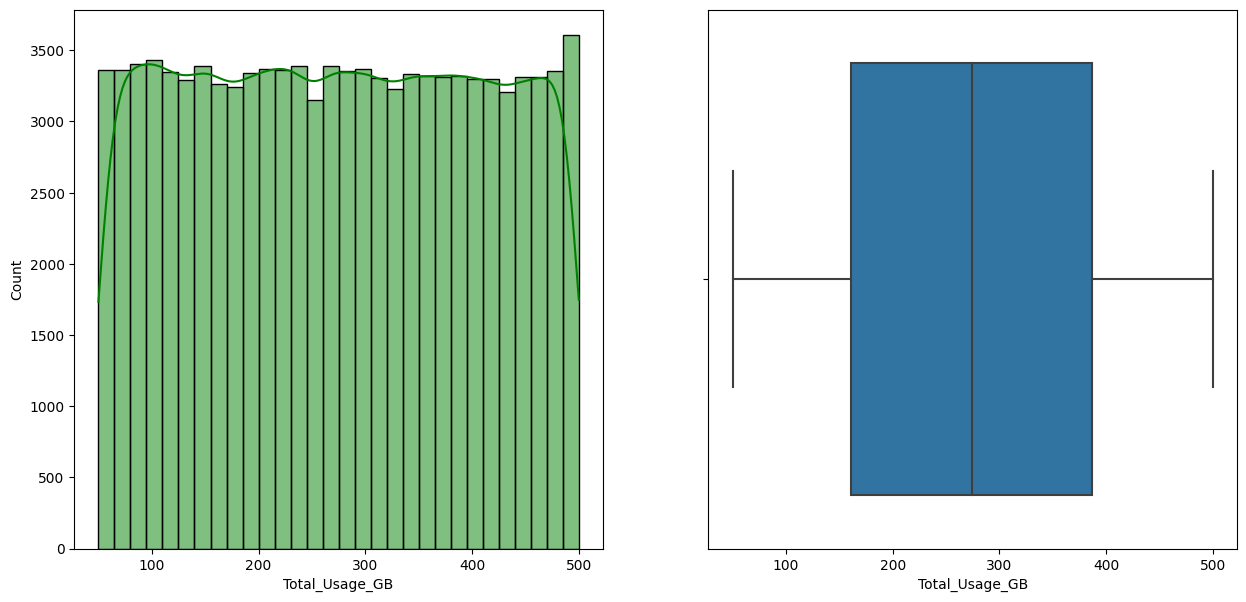

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Usage_GB',bins=30,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df,x='Total_Usage_GB')
plt.show()

### **Churn**

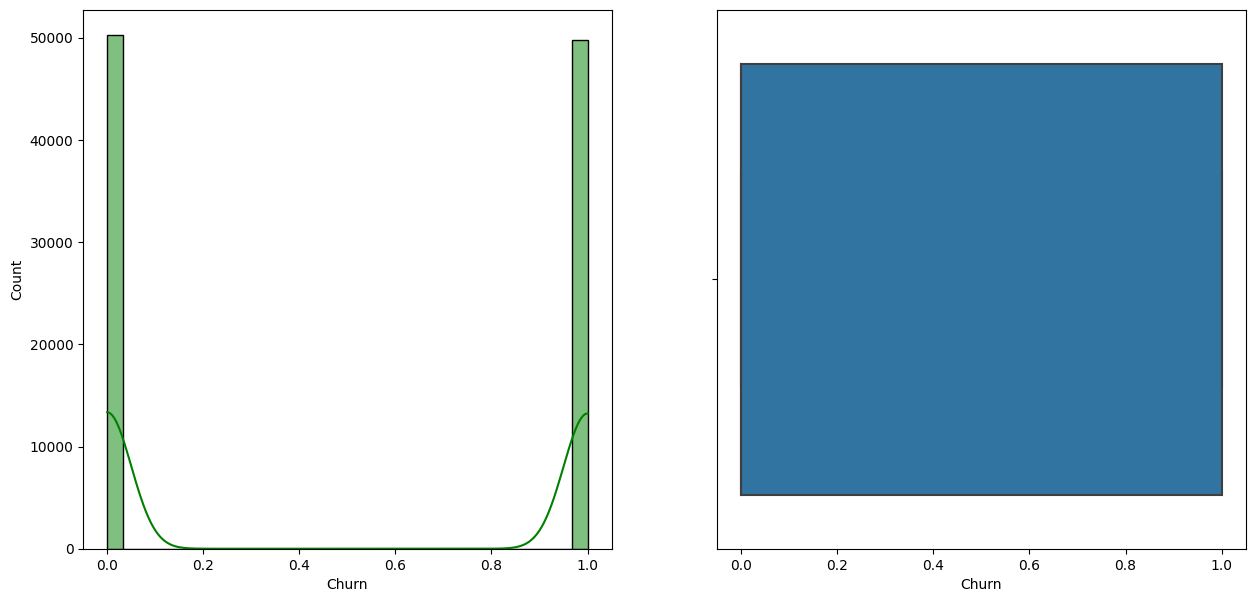

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Churn',bins=30,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df,x='Churn')
plt.show()

*  ### **No Outlier Present in any these columns.**
*  ### **All variables are approximately normally distributed**






###  **checking the class imbalance**

In [ ]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64


###  **The distribution of the Churn variable is almost balanced, with approximately 50,221 instances in the "Not Churn" category and 49,779 instances in the "Churn" category**

# **Data spliting**

---



---


In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

## **Feture Selection**

---



---


###  **Find important features with Random Forest model**

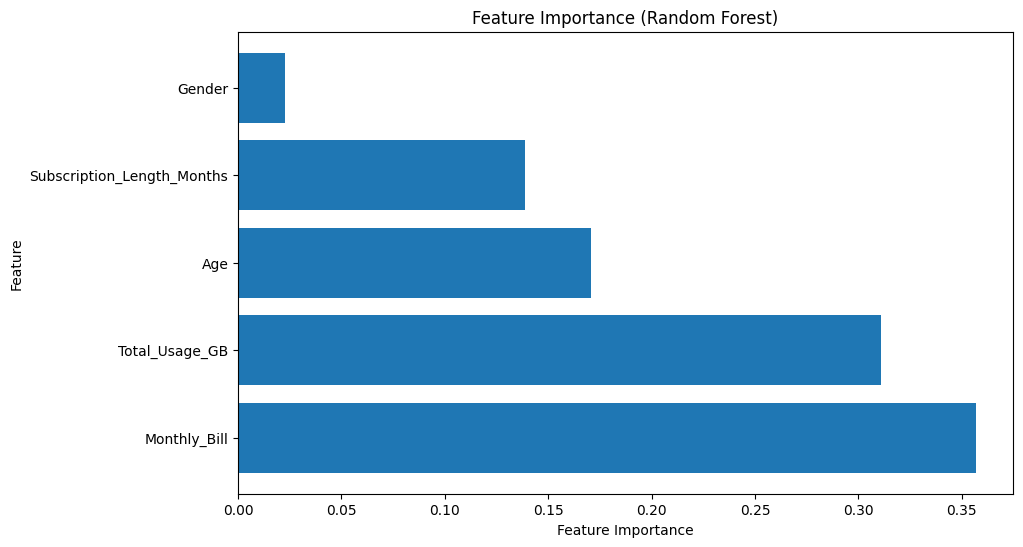

In [ ]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()


###  **These visualization show that only 4 variable are importnat for the analysis.these variable are :**


*  **Monthly Bill**

*  **Total usage in GB**

*   **Age**

* **Subscription length in months**




In [ ]:
X = df.drop(columns = ['Churn','Gender'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(100000, 4) (70000, 4) (30000, 4)


###  **Take 70% data for training and 30% for testing**




## **Feature Scaling**

---



---




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,-1.243589,0.074501,1.632642,1.481066
1,0.654284,-1.515230,0.336478,0.829765
2,-0.785482,1.086147,0.027632,1.166909
3,1.112391,-0.070020,0.894871,-1.614532
4,1.701386,-1.081667,-1.144499,-1.346349
...,...,...,...,...
69995,-0.589150,1.230668,0.110650,-0.304266
69996,0.785172,0.074501,1.003585,0.553919
69997,1.635943,-1.515230,0.550940,0.354698
69998,0.719728,-0.070020,1.190869,0.308723


## **Model Building**

---



---






In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(n_jobs=-1,random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(n_jobs=-1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Fit the model
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Evaluate the model on the training dataset
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Evaluate the model on the test dataset
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy}")
    print(f"Precision: {train_precision}")
    print(f"Recall: {train_recall}")
    print(f"F1 Score: {train_f1}")

    print("------------------------")

    print("Testing Metrics:")
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1 Score: {test_f1}")
    print("------------------------")


Model: Random Forest
Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
------------------------
Testing Metrics:
Accuracy: 0.5007
Precision: 0.49543012628200656
Recall: 0.47824622844827586
F1 Score: 0.4866865426133443
------------------------
Model: XGBoost
Training Metrics:
Accuracy: 0.6603571428571429
Precision: 0.6611859215165
Recall: 0.6550342103003063
F1 Score: 0.6580956900642824
------------------------
Testing Metrics:
Accuracy: 0.5009333333333333
Precision: 0.4958034384729931
Recall: 0.49333243534482757
F1 Score: 0.49456485044899057
------------------------
Model: Gaussian Naive Bayes
Training Metrics:
Accuracy: 0.5014857142857143
Precision: 0.5006619009796135
Recall: 0.3789470670750909
F1 Score: 0.43138341209059805
------------------------
Testing Metrics:
Accuracy: 0.49933333333333335
Precision: 0.4924956369982548
Recall: 0.3801185344827586
F1 Score: 0.42907100501748524
------------------------
Model: Logistic Regression
Training Metrics:
Accuracy: 0.50

## **Random Forest:**

*   **Achieves perfect training accuracy (1.0) with high precision, recall, and F1 score.**
*  **However, testing accuracy is around 50%, indicating potential overfitting.**

---

## **XGBoost:**

*  **Offers reasonable training metrics with good precision, recall, and F1 score.**
*  **Testing accuracy is approximately 50%, suggesting a balanced performance.**

---

## **Gaussian Naive Bayes:**



*  **Shows low training accuracy and moderate precision, recall, and F1 score**
*  **Testing metrics are relatively balanced, with accuracy around 49.93%.**

---

## **Logistic Regression:**

*  **Provides training metrics similar to Gaussian Naive Bayes**
*  **Testing metrics are balanced, with accuracy at approximately 49.84%.**

---

## **Decision Tree:**

*   **Achieves perfect training accuracy but lower testing accuracy.**
*   **Testing metrics are well-balanced, with accuracy near 50%.**

---

## **AdaBoost:**

* **Offers training metrics similar to Logistic Regression and Gaussian Naive Bayes.**
* **Testing metrics are balanced, with accuracy around 49.85%.**


# **Ensembles of Random Forest**

---



---







In [84]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [adaboost_model, gradient_boost_model, xgboost_model]:
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
print(results_train_df)

print('----------------------------------------------------------')

print("Testing Data Results:")
print(results_test_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Data Results:
                   Accuracy  Precision    Recall  F1 Score
AdaBoost           1.000000   1.000000  1.000000  1.000000
Gradient Boosting  0.524737   0.525012  0.524737  0.522147
XGBoost            0.609387   0.609424  0.609387  0.609306
----------------------------------------------------------
Testing Data Results:
                   Accuracy  Precision   Recall  F1 Score
AdaBoost            0.50065   0.500529  0.50065  0.500470
Gradient Boosting   0.50660   0.506197  0.50660  0.504250
XGBoost             0.50095   0.500859  0.50095  0.500836


###  **None of the ensemble models (AdaBoost, Gradient Boosting, and XGBoost) achieved the desired level of predictive performance for the given dataset**

## **Hyperparameter Tunning on XGBoost Classifier**
---
---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score


# Define hyperparameter grids for Grid Search CV
grid_params = {
    'learning_rate': [0.2],
    'max_depth': [5],
    'min_child_weight': [2],
    'n_estimators': [300]
}

# Define hyperparameter distributions for Randomized Search CV
random_params = {
    'learning_rate': np.linspace(0.1, 0.3, 5),
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'n_estimators': np.arange(100, 500, 10)
}

# Create XGBoost classifiers
xgb_grid = XGBClassifier()
xgb_random = XGBClassifier()

# Perform Grid Search CV
grid_search = GridSearchCV(xgb_grid, param_grid=grid_params, scoring='accuracy', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(xgb_random, param_distributions=random_params, n_iter=5, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
random_search.fit(X_train, y_train)

# Get the best estimators and best scores from both searches
best_estimator_grid = grid_search.best_estimator_
best_score_grid = grid_search.best_score_

best_estimator_random = random_search.best_estimator_
best_score_random = random_search.best_score_

# Fit the best models on the full training set
best_estimator_grid.fit(X_train, y_train)
best_estimator_random.fit(X_train, y_train)

# Make predictions
y_pred_grid = best_estimator_grid.predict(X_test)
y_pred_random = best_estimator_random.predict(X_test)

# Calculate accuracy and F1 score for both models on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
f1_score_grid = f1_score(y_test, y_pred_grid)

accuracy_random = accuracy_score(y_test, y_pred_random)
f1_score_random = f1_score(y_test, y_pred_random)

# Print the results
print("Results for Grid Search CV:")
print("Best Hyperparameters:", grid_params)
print("Best Accuracy:", best_score_grid)
print("Test Accuracy:", accuracy_grid)
print("Test F1 Score:", f1_score_grid)

print("\nResults for Randomized Search CV:")
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", best_score_random)
print("Test Accuracy:", accuracy_random)
print("Test F1 Score:", f1_score_random)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=300;, score=0.501 total time=   5.2s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=300;, score=0.501 total time=   3.2s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=300;, score=0.501 total time=   1.2s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=300;, score=0.505 total time=   1.2s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=300;, score=0.503 total time=   1.2s
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Results for Grid Search CV:
Best Hyperparameters: {'learning_rate': [0.2], 'max_depth': [5], 'min_child_weight': [2], 'n_estimators': [300]}
Best Accuracy: 0.502075
Test Accuracy: 0.49605
Test F1 Score: 0.4871520887396326

Results for Randomized Search CV:
Best Hyperparameters: {'n_estimators': 460, 'min_

### **After using Both (Randomized Search CV and Grid serach Cv) hyperparameter tuning, the performance of the model did not improve.**

## **Bayesian optimization in XGBoost Clasifier**

---



---





In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split



# Define the hyperparameter search space
param_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'min_child_weight': Real(0.1, 10.0, prior='log-uniform'),
    'n_estimators': Integer(100, 500)
}

# Create an XGBoost classifier
XGBoost = XGBClassifier()

# Perform Bayesian optimization
bayes_search = BayesSearchCV(
    XGBoost,
    param_space,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=3
)

# Fit the Bayesian search on the training data
bayes_search.fit(X_train, y_train)

# Get the best estimator and best parameters
best_estimator = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Evaluate the best estimator on the test data
y_pred = best_estimator.predict(X_test)

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
print("Test F1 Score:", f1)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### **Also Bayesian Optimization is not improve the model performance**

## **Cross Validation**

---



---


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

XGBoost= XGBClassifier(n_jobs=-1, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(XGBoost, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Mean CV Score(Accuracy):", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)



Cross-Validation Scores: [0.5042  0.49775 0.5067  0.4991  0.50175]
Mean CV Score(Accuracy): 0.5018999999999999
Standard Deviation of CV Scores: 0.003268485887991568


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

XGBoost = XGBClassifier(n_jobs=-1, random_state=42)

# Perform cross-validation with scoring set to 'recall'
cv_scores_recall = cross_val_score(XGBoost, X, y, cv=5, scoring='recall')

# Print the cross-validation recall scores
print("Cross-Validation Recall Scores:", cv_scores_recall)

# Calculate the mean and standard deviation of the cross-validation recall scores
mean_cv_recall = np.mean(cv_scores_recall)
std_cv_recall = np.std(cv_scores_recall)

print("Mean CV Recall Score(Recall):", mean_cv_recall)
print("Standard Deviation of CV Recall Scores:", std_cv_recall)


Cross-Validation Recall Scores: [0.49030638 0.47900763 0.48583769 0.46966653 0.48533548]
Mean CV Recall Score(Recall): 0.4820307413896887
Standard Deviation of CV Recall Scores: 0.0071542030516822674


# Build Neural Network Architecture

---



---



In [76]:
from keras.models import Sequential
from keras.layers import Dense

In [79]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.8600 - accuracy: 0.4980 - val_loss: 0.7246 - val_accuracy: 0.5016
Epoch 2/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7263 - accuracy: 0.4997 - val_loss: 0.7323 - val_accuracy: 0.5052
Epoch 3/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.7134 - accuracy: 0.4986 - val_loss: 0.7130 - val_accuracy: 0.4961
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7060 - accuracy: 0.4998 - val_loss: 0.7067 - val_accuracy: 0.5013
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7028 - accuracy: 0.4986 - val_loss: 0.6936 - val_accuracy: 0.5041
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6987 - accuracy: 0.4995 - val_loss: 0.6971 - val_accuracy: 0.5035
Epoch 7/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6954 - accuracy: 0.5040 - val_loss: 0.6942 - val_ac

### **After trying various ways to make the model better, I've decided to use only the XGBoost classifier model**:

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the XGBoost model
xgb_model = classifiers["XGBoost"]
xgb_model.fit(X_train, y_train)
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate performance metrics for XGBoost
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
f1_xgb = f1_score(y_test, y_test_pred_xgb)
recall_xgb = recall_score(y_test, y_test_pred_xgb)

# Create a DataFrame for XGBoost results
xgb_results_df = pd.DataFrame({
    "Model": ["XGBoost"],
    "Train Accuracy": [train_accuracy_xgb],
    "Test Accuracy": [test_accuracy_xgb],
    "F1 Score": [f1_xgb],
    "Recall": [recall_xgb]
})

# Print the XGBoost results
print("XGBoost Results:")
print(xgb_results_df)

print("---------------------------------------------------------------------")

# Print the classification report for XGBoost
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_test_pred_xgb))

# Calculate and print the confusion matrix for XGBoost
confusion_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(confusion_matrix_xgb)




XGBoost Results:
     Model  Train Accuracy  Test Accuracy  F1 Score    Recall
0  XGBoost          0.6546         0.5035  0.493729  0.488056
---------------------------------------------------------------------
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix for XGBoost:
[[5228 4851]
 [5079 4842]]


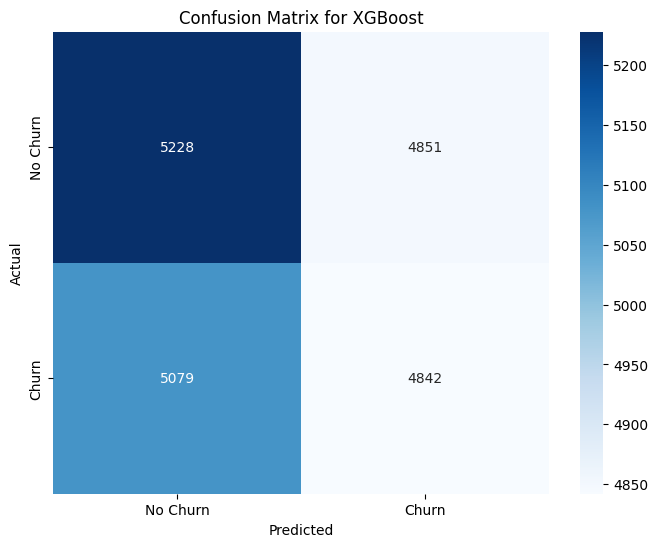

In [80]:
# Calculate and print the confusion matrix for XGBoost
confusion_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


### **Save model in a pickle file**

In [ ]:
import joblib

# Save the XGBoost model to a file
model_filename = "xgboost_model.pkl"
joblib.dump(xgb_model, model_filename)


['xgboost_model.pkl']